In [1]:
# Import python packages
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# open the dataset by rasterio
# You can write the name of the tif file if it is in the same folder/ directory of the python file, otherwise you should include the full path to the file
ds=rio.open("DEM.tif")

In [3]:
# Read the data set as numpy array
arr=ds.read(1)

In [4]:
# The nodata value in the raster dataset is -3.402823e+38,

In [5]:
# Getting the min value in the array
arr.min()

-3.402823e+38

In [6]:
# Mask the raster using numpy where ( if the pixel has value bigger than the minimum value(-3.402823e+38), its value will change to 1, otherwise its value will change to 0  )
arr=np.where(arr>arr.min(),1,0)

In [7]:
# The masked array (it is values are 0 or 1)
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<function matplotlib.pyplot.show(close=None, block=None)>

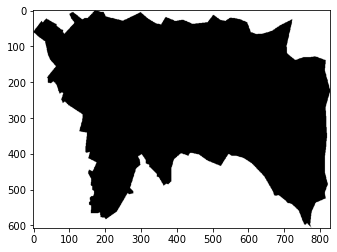

In [8]:
# plotting the masked array
plt.imshow(arr, cmap="Greys")
plt.show

In [10]:
# create a new dataset to save the masked array in it 
# crs and transform are optional to be defined, others are necessary
# Here we create the new data set but 
new_ds=rio.open("masked.tif","w",
               driver="GTiff",
               height=ds.height,
               width=ds.width,
               count=1,
               dtype=arr.dtype,
               crs=ds.crs,
               transform=ds.transform)

In [11]:
new_ds.write(arr, 1)

In [12]:
new_ds.close()